# DEEP CONVOLUTIONAL GAN MODEL

In [ ]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow_datasets as tfds
from keras.utils import plot_model
from IPython import display


tf.__version__


'2.15.0'

In [ ]:
# CONFIGS
BUFFER_SIZE = 60000
BATCH_SIZE = 256
EPOCHS = 100
LATENT_SPACE_DIMENSION = 100
NUM_EXAMPLES = 16

### Load and Preprocess Data <br>
Dataset: `MNIST`
<br>
Normalize - the images in range [-1, 1] <br>
`255` is the max possible value of a pixel, so we normalize the entire dataset using `127.5` as a midpoint-value


In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Display an example
train_images[237]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  12, 255, 151,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  12, 253, 206,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  12, 253, 238,  48,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  12, 253, 253,  70,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  12, 253, 253, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  80, 203,  76,   0,   0,   0,
          0,   0,   0,   0,  12, 253, 253, 138,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2, 191, 253, 147,   0,   0,   0,
          0,   0,   0,   0,  15, 253, 253,  70,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  24, 217, 253, 157,   1,   0,   0,
          0,   0,   0,   0, 130, 253, 227,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 189, 253, 253,  11,   0,   0,
          0,   0,   0,   0, 205, 253, 186,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 189, 253, 178,   4,   0,   0,
          0,   0,   0,  79, 252, 253,  88,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  42, 239, 253, 179,  76,   0,   0,
          0,   0,   0, 113, 253, 253,  88,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  54, 253, 253, 253, 252, 213, 194,
         95,  67,   0, 212, 253, 228,  14,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 225, 253, 201, 253, 253, 253,
        253, 246, 175, 251, 253, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   5,   3,   5,  72, 198,
        244, 253, 253, 253, 242,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         25, 150, 253, 253, 228,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100, 253, 253, 124,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         16, 210, 253, 224,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         60, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        107, 253, 253,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        123, 253, 209,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# Reshape
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

# Normalize
train_images = (train_images - 127.5) / 127.5

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
  save_dir = "GAN/mnist/images/"

  # Create Directory to save file
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

### Create the models

#### The Generator
- Use `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise)
- Start with a Dense layer that takes this seed as input, then upsample several times until you reach the desired image size of `28x28x1`
- `LeakyReLU` activation is used for each layer, except the output layer which uses `tanh`

In [ ]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*8, use_bias=False, input_shape=(100,), activation='leaky_relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Reshape((7, 7, 8)))
    assert model.output_shape == (None, 7, 7, 8)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='leaky_relu'))
    assert model.output_shape == (None, 7, 7, 256)
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='leaky_relu'))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

#### Use the (untrained) generator model to create an image from noise

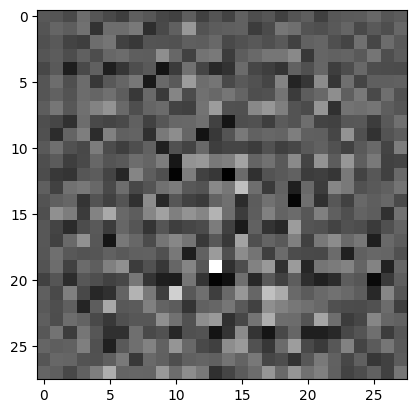

In [ ]:
generator = generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

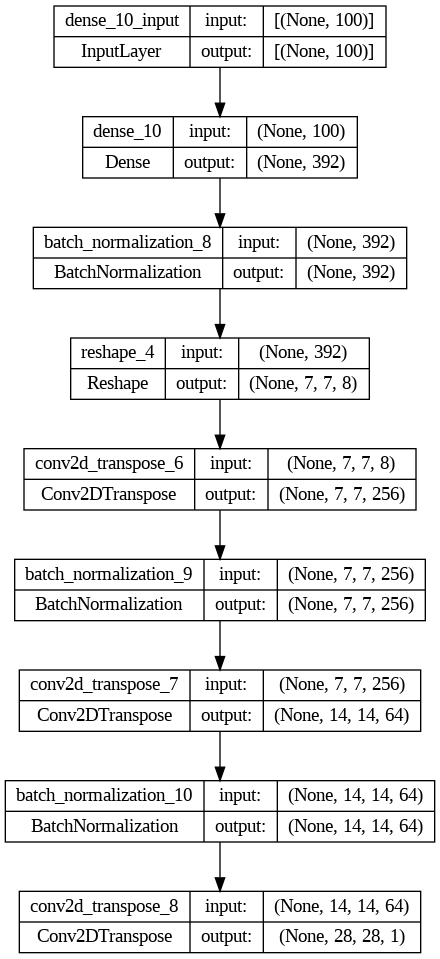

In [ ]:
# Plot the Generator Model Diagram
plot_model(generator, to_file=save_dir + 'gen_model_plot.png', show_shapes=True, show_layer_names=True)

#### The Discriminator
Basically a simple CNN-based image classifier

In [ ]:
def discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1], activation='leaky_relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='leaky_relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='leaky_relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))

    return model

#### Use the (untrained) discriminator to classify the generated images as real or fake.
The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
discriminator = discriminator_model()

print ("Input Image - Real vs Fake Probability =", discriminator(generated_image).numpy().item())

Input Image - Real vs Fake Probability = 0.00033390242606401443


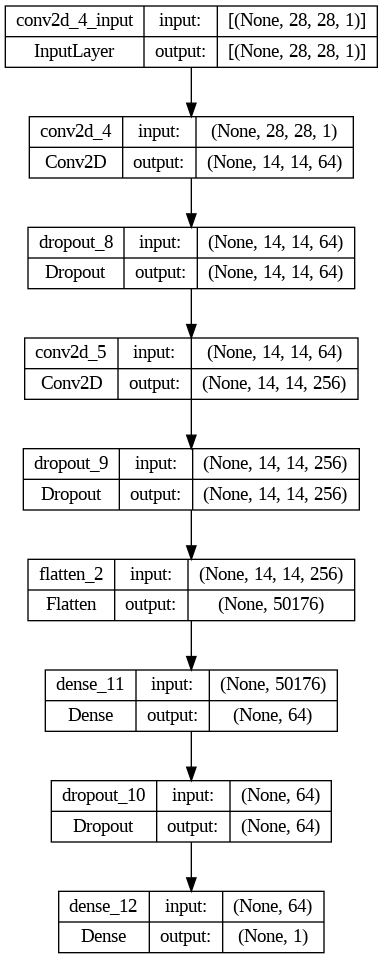

In [ ]:
# Plot the Discriminator Model Diagram

plot_model(discriminator, to_file=save_dir + 'disc_model_plot.png', show_shapes=True, show_layer_names=True)

Define Loss Functions, Optimizers for both Models

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
# The discriminator and the generator optimizers are different since you will train two networks separately.
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Define custom Gen and Disc Loss Calculation Functions


In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Create a Random Seed to use generally in the code

In [ ]:
seed = tf.random.normal([NUM_EXAMPLES, LATENT_SPACE_DIMENSION])

#### Training Loop:
- Generator receives random seed input
- Seed produces a "noisy" image
- Discriminator is used to classify images as Real (Images taken from train set -> Positively High Output Probability) or Fake (Images generated by Generator -> Negatively Low Output Probability)
- Loss is calculated using custom functions for both models
- Gradients are calculated and used to update the generator and discriminator models


In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_SPACE_DIMENSION])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

#### Utility Function to save images

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig(save_dir + 'mnist_%d.png' % epoch)
  plt.show()

#### Training Function

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    total_gen_loss = 0
    total_disc_loss = 0
    for image_batch in dataset:
      gen_loss, disc_loss = train_step(image_batch)

      total_gen_loss += gen_loss
      total_disc_loss += disc_loss

    # Convert tensors to NumPy arrays before rounding and formatting
    avg_gen_loss = total_gen_loss.numpy() / BATCH_SIZE
    avg_disc_loss = total_disc_loss.numpy() / BATCH_SIZE



    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Display metrics
    print('Epoch {} is {} sec | Generator Loss = {:.7f} | Discriminator Loss = {:.7f}'.format(
            epoch + 1,
            round(time.time() - start, 2),
            avg_gen_loss,
            avg_disc_loss)
        )

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

#### Train the GAN Model

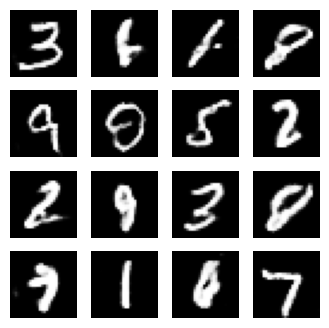

In [ ]:
train(train_dataset, EPOCHS)

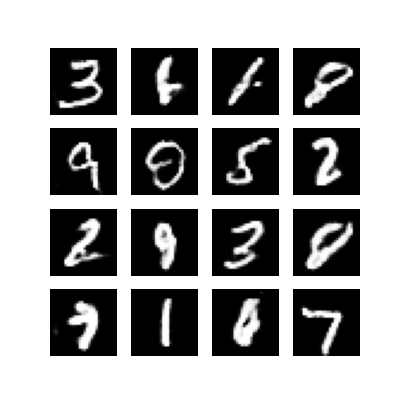

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open(save_dir + 'mnist_%d.png' % epoch_no)

display_image(EPOCHS) # Display Last Generated Image

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = save_dir + 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob(save_dir + 'mnist*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-70-ce9f1831b3ab>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-70-ce9f1831b3ab>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



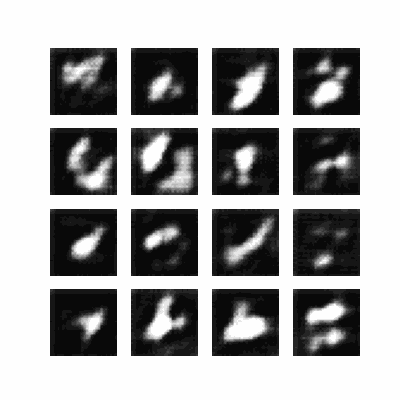

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)